In [1]:
from generator_based_on_Seattle import *

In [2]:
from parameters import *

In [3]:
generated_traffic_combined = generate_traffic_based_on_seattle(
    from_date=FROM_DATE, 
    to_date=TO_DATE, 
    first_erlang=LAMBDA_0, 
    constant_bitrate=IS_CONSTANT_BITRATE, 
    aggregation=AGGREGATION, 
    resampling=RESAMPLING)

In [4]:
generated_traffic_combined

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.003140,12,0,100,0.003140,0.516324
2,0.009222,13,6,100,0.009222,2.475916
3,0.009460,2,4,100,0.009460,1.537206
4,0.010552,9,10,100,0.010552,0.327817
...,...,...,...,...,...,...
243480,725.259898,11,1,100,725.259898,725.513459
243481,725.260848,4,7,100,725.260848,726.281022
243482,725.262452,2,11,100,725.262452,726.785825
243483,725.263203,6,13,100,725.263203,726.352975


In [5]:
generated_traffic = divide_generated_traffic_into_periods(generated_traffic_combined,UPGRADE_PERIOD)

In [6]:
generated_traffic[0]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.003140,12,0,100,0.003140,0.516324
2,0.009222,13,6,100,0.009222,2.475916
3,0.009460,2,4,100,0.009460,1.537206
4,0.010552,9,10,100,0.010552,0.327817
...,...,...,...,...,...,...
26702,89.990924,6,1,100,89.990924,90.310598
26703,89.991282,11,9,100,89.991282,91.041715
26704,89.995351,13,4,100,89.995351,90.612609
26705,89.997820,0,4,100,89.997820,90.387232


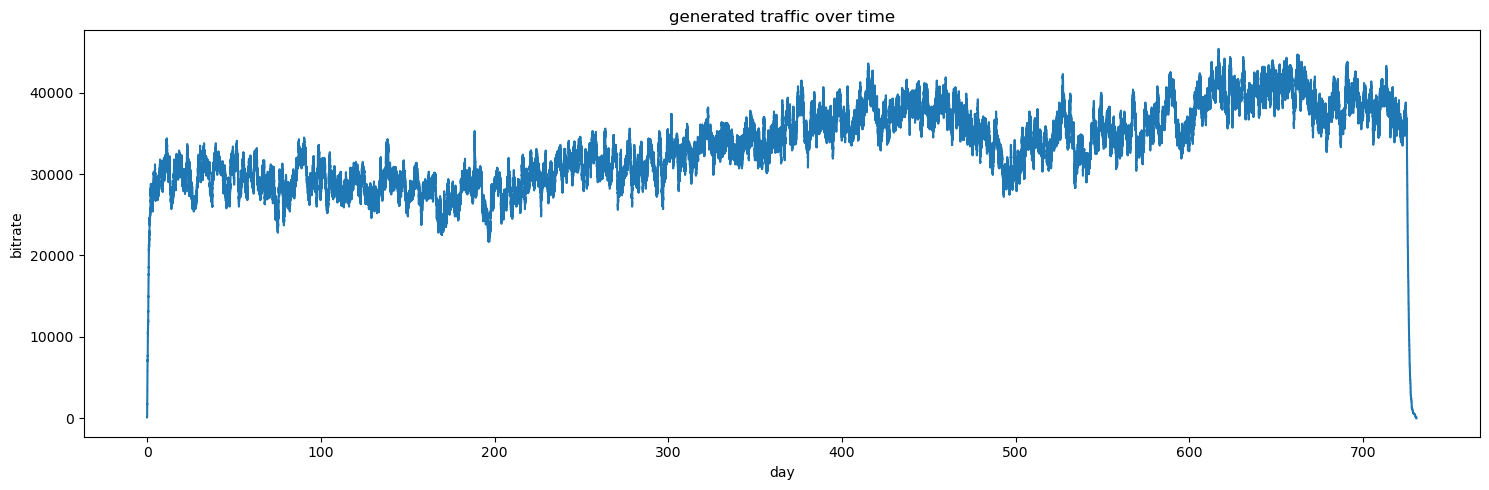

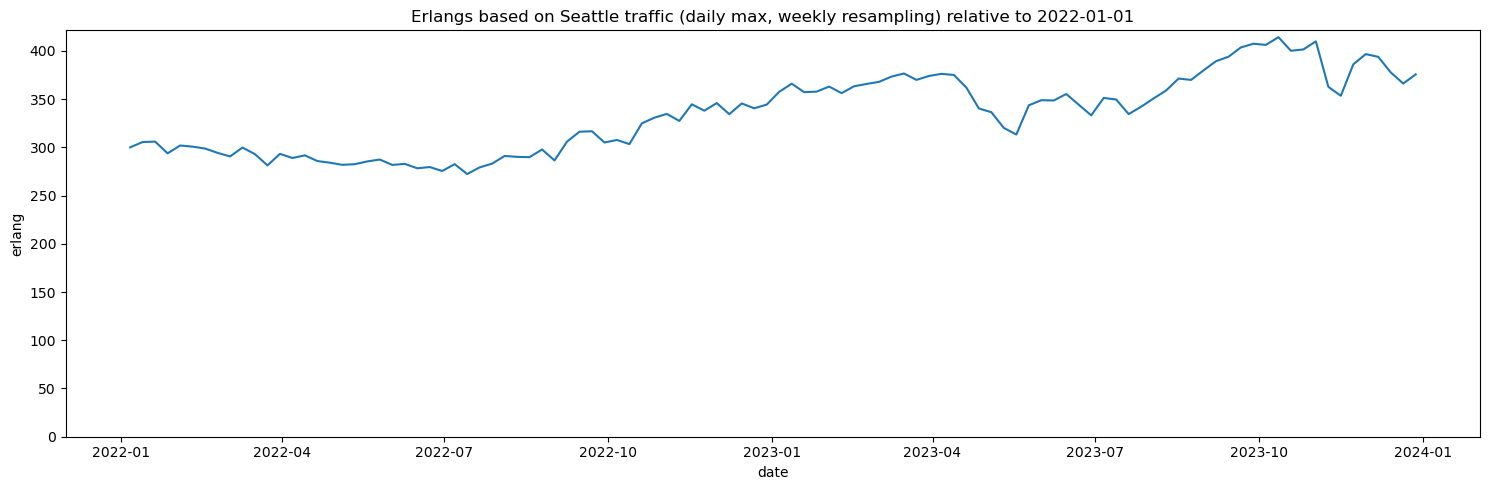

In [7]:
draw_generated_traffic(generated_traffic_combined)
draw_erlangs_from_Seattle(
    from_date=FROM_DATE, 
    to_date=TO_DATE, 
    first_erlang=LAMBDA_0, 
    aggregation=AGGREGATION, 
    resampling=RESAMPLING)

In [8]:
predicted_traffic = perdict_traffic(generated_traffic_combined, constant_bitrate=IS_CONSTANT_BITRATE, period_length=UPGRADE_PERIOD, alpha=ALPHA_PERCENT)

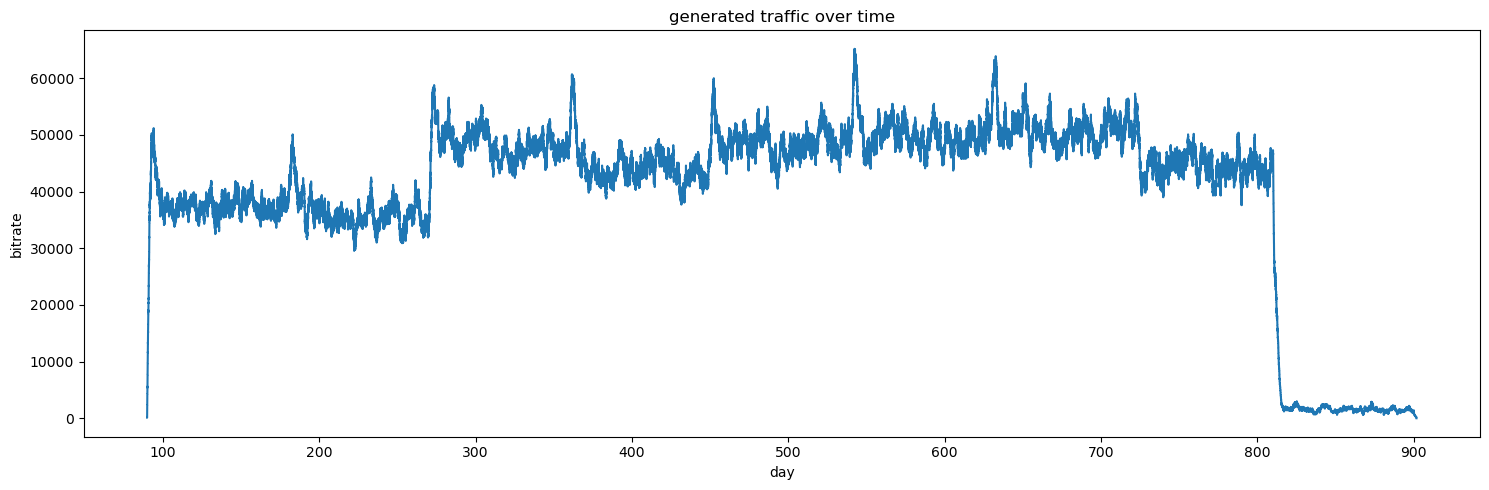

In [9]:
draw_generated_traffic(pd.concat(predicted_traffic))

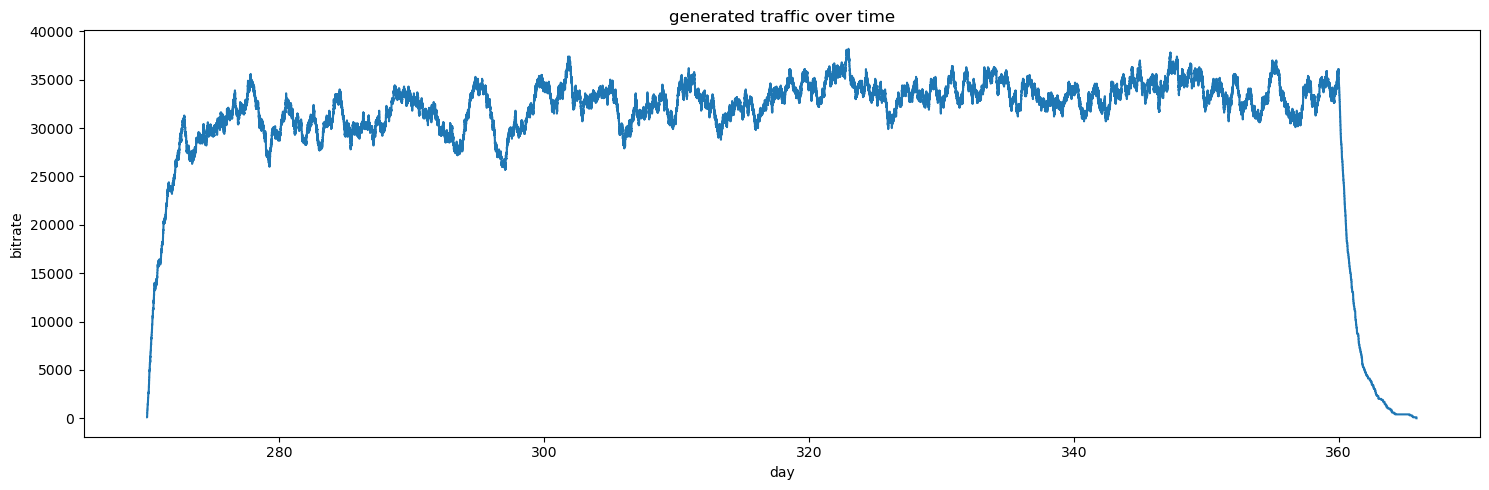

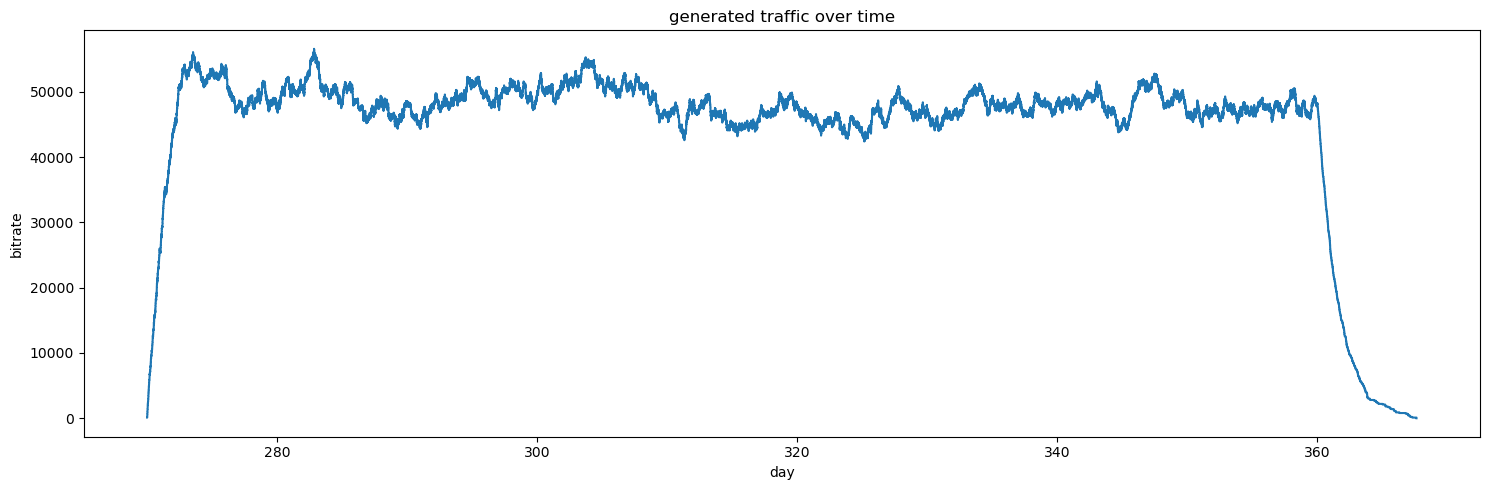

In [10]:
draw_generated_traffic(divide_generated_traffic_into_periods(generated_traffic_combined,UPGRADE_PERIOD)[3])
draw_generated_traffic(predicted_traffic[2])

In [11]:
type(generated_traffic)

list

In [12]:
type(generated_traffic[0])

pandas.core.frame.DataFrame

In [13]:
len(generated_traffic)

9

In [14]:
type(predicted_traffic)

list

In [15]:
type(predicted_traffic[0])

pandas.core.frame.DataFrame

In [16]:
len(predicted_traffic)

9

In [17]:
generated_traffic[-1]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
241532,720.002596,0,11,100,720.002596,720.129911
241533,720.003125,1,2,100,720.003125,720.743958
241534,720.006782,9,0,100,720.006782,720.132190
241535,720.007903,1,13,100,720.007903,720.181008
241536,720.009334,2,13,100,720.009334,720.502579
...,...,...,...,...,...,...
243480,725.259898,11,1,100,725.259898,725.513459
243481,725.260848,4,7,100,725.260848,726.281022
243482,725.262452,2,11,100,725.262452,726.785825
243483,725.263203,6,13,100,725.263203,726.352975


In [18]:
predicted_traffic[0].iloc[len(predicted_traffic)]

current_global_time     90.022412
source_id               10.000000
destination_id           6.000000
datarate               100.000000
arrival_time            90.022412
departure_time          90.564402
Name: 9, dtype: float64

In [23]:
from pathlib import Path

parent_folder: str = 'generated_traffic_data'
load_folder_path: str = parent_folder + '/' + 'load' + '_' + str(LAMBDA_0)
actual_traffic_folder_path: str = load_folder_path + '/' + 'actual_traffic'
predicted_traffic_folder_path: str = load_folder_path + '/' + 'predicted_traffic'

# Do not create patent folder 'generated_traffic_data' again
Path(load_folder_path).mkdir(parents=True, exist_ok=True)
Path(actual_traffic_folder_path).mkdir(parents=True, exist_ok=True)
Path(predicted_traffic_folder_path).mkdir(parents=True, exist_ok=True)

In [ ]:
generated_traffic

In [32]:
# Save generated Traffic
for index, traffic_dataframe in enumerate(generated_traffic):
    #specify path for export
    filepath: str = actual_traffic_folder_path + '/' + 'actual_traffic' + '_' + str(UPGRADE_PERIOD * index) + '_' + str(UPGRADE_PERIOD * (index + 1)) + '.txt'

    #export DataFrame to text file
    with open(filepath, 'a') as f:
        df_string = traffic_dataframe.to_string(header=False, index=True)
        f.write(df_string)

In [35]:
# Save predicted Traffic
for index, traffic_dataframe in enumerate(predicted_traffic):
    #specify path for export
    filepath: str = predicted_traffic_folder_path + '/' + 'predicted_traffic' + '_' + str(UPGRADE_PERIOD * (index + 1)) + '_' + str(UPGRADE_PERIOD * (index + 2)) + '.txt'

    #export DataFrame to text file
    with open(filepath, 'a') as f:
        df_string = traffic_dataframe.to_string(header=False, index=True)
        f.write(df_string)